# Задача

**а)** Рассчитать теплопроводность кремния для заданного интервала температур. Количество расчетных значений - 20, формула вычисления теплопроводности:
$$
\begin{equation*}
    \lambda_t = b \cdot \frac{\lambda_0}{t-t_0}
\end{equation*}
$$
где:

$\lambda_t$ - теплопроводность для температуры $t$;

$t_0$ - температура, равная 100°К;

$\lambda_0$ - теплопроводность кремния при температуре 100°К, равная 884 Вт/(м·К) ;

$b$- константа, подбираемая экспериментально, равна 33.

**б)** Сравнить расчетные значения теплопроводности, вычисленные по формуле , со значениями, полученными экспериментально.

Для этого:

1. Вычислить значения теплопроводности по формуле вычисления теплопроводности для приведенного в таблице диапазона температур.

2. Посчитать относительную погрешность каждого измерения.

3. Найти минимальную и максимальную погрешность вычислений, указать для каких значений температур они вычислены, найти среднюю погрешность.

**в)** Построить графики экспериментальных и теоретических значений теплопроводности на интервале температур от 200° до 1600° по Кельвину.

## Реализация задачи, часть а)

In [1]:
def compute_lambda(t):
    b = 33
    l_0 = 884
    t_0 = 100
    y = b * l_0 /(t-t_0)
    return y

In [2]:
# Границы температурного интервала
# t1=float(input("t1 = "))
# t2=float(input("t2 = "))
t1 = 200
t2 = 1500

if t2 <= t1 or t1 <= 100:    
    print("Неверные границы температур")    
else:    
    n = 20
    h = (t2 - t1)/(n - 1)

    t_list = [t1 + i * h for i in range(0,n)]
    lambda_list = [compute_lambda(t) for t in t_list]
    
    print("-" * 21)
    print("| %7s | %7s |" % ("t", "L(t)"))
    print("-" * 21)
    for i in range(len(t_list)):
         print("| %7.2f | %7.2f |" % (t_list[i], lambda_list[i]))
    print("-" * 21)

---------------------
|       t |    L(t) |
---------------------
|  200.00 |  291.72 |
|  268.42 |  173.21 |
|  336.84 |  123.17 |
|  405.26 |   95.56 |
|  473.68 |   78.07 |
|  542.11 |   65.98 |
|  610.53 |   57.14 |
|  678.95 |   50.39 |
|  747.37 |   45.06 |
|  815.79 |   40.76 |
|  884.21 |   37.20 |
|  952.63 |   34.21 |
| 1021.05 |   31.67 |
| 1089.47 |   29.48 |
| 1157.89 |   27.58 |
| 1226.32 |   25.90 |
| 1294.74 |   24.42 |
| 1363.16 |   23.09 |
| 1431.58 |   21.91 |
| 1500.00 |   20.84 |
---------------------


## Реализация задачи, часть б)
1. Создать файл `lambda_exp.txt`. Структура файла следующая: каждая строка включает значение температуры и экспериментальное значение теплопроводности через пробел. После последней строки вставить `enter`:
```
200 264
300 148
400 98.2
500 76.2
600 61.3
700 50.8
800 42.2
900 35.9
1000 31.2
1100 28.5
1200 25.7
1300 24.6
1400 23.5
1500 22.8
1600 22.1
```

In [3]:
def compute_lambda(t):
    b = 33
    l_0 = 884
    t_0 = 100
    y = b * l_0 /(t-t_0)
    return y

In [4]:
f = open("lambda_exp.txt", "r")

t_list =[]
lambda_exp_list = []

for line in f:
    t_lambda_list = line.split()
    t_list.append(float(t_lambda_list[0]))
    lambda_exp_list.append(float(t_lambda_list[1]))
    
f.close()

In [5]:
lambda_list =[compute_lambda(t) for t in t_list]

error_list = [abs((lambda_exp_list[i] - lambda_list[i]) / lambda_exp_list[i] )
              for i in range(len(t_list))]

In [6]:
print("-" * 40)
print("|%7s | %7s | %7s |%8s |" % ("t","l(t)","exp(t)", "error"))
print( "-" * 40)

for i in range(len(t_list)):
    print("|%7d | %7.3f | %7.1f |%7.2f%% |"
          % (t_list[i], lambda_list[i], lambda_exp_list[i], error_list[i] * 100))

print("-" * 40) 

----------------------------------------
|      t |    l(t) |  exp(t) |   error |
----------------------------------------
|    200 | 291.720 |   264.0 |  10.50% |
|    300 | 145.860 |   148.0 |   1.45% |
|    400 |  97.240 |    98.2 |   0.98% |
|    500 |  72.930 |    76.2 |   4.29% |
|    600 |  58.344 |    61.3 |   4.82% |
|    700 |  48.620 |    50.8 |   4.29% |
|    800 |  41.674 |    42.2 |   1.25% |
|    900 |  36.465 |    35.9 |   1.57% |
|   1000 |  32.413 |    31.2 |   3.89% |
|   1100 |  29.172 |    28.5 |   2.36% |
|   1200 |  26.520 |    25.7 |   3.19% |
|   1300 |  24.310 |    24.6 |   1.18% |
|   1400 |  22.440 |    23.5 |   4.51% |
|   1500 |  20.837 |    22.8 |   8.61% |
|   1600 |  19.448 |    22.1 |  12.00% |
----------------------------------------


In [7]:
max_error = max(error_list)
index_max_error = error_list.index(max_error)

print("Максимальная погрешность = %5.2f%%  при t = %5d" 
      % (max_error * 100, t_list[index_max_error]))

Максимальная погрешность = 12.00%  при t =  1600


In [8]:
min_error = min(error_list)
index_min_error = error_list.index(min_error)

print("Минимальная погрешность = %5.2f%%  при t = %5d" 
      % (min_error * 100, t_list[index_min_error]))

Минимальная погрешность =  0.98%  при t =   400


In [9]:
avg_error = sum(error_list) / len(t_list)
print("Средняя погрешность = %5.2f%%" % (avg_error * 100))

Средняя погрешность =  4.33%


## Задание
Результаты сравнения экспериментального и вычисленного значения теплопроводности показывают, что наибольшая погрешность наблюдается для первой (200 К) и двух последних (1500 К и 1600 К) температур. Используя предыдущую задачу, вычислите максимальную и среднюю погрешность для интервала температур от 300 К до 1400 К.

Пояснение. Для того, чтобы выделить из списка его часть используются  "срезы". Например, чтобы выделить из списка значения  с индексами от 2 до 4 (включительно) и сформировать новый список, используется запись:
```python
x_list = [2, 4, -5, 1, 8, -3, 7]
y_list = x_list[2:5] # будет занесено [-5, 1, 8]
```

In [10]:
t_min = 300
t_max = 1400

ind_min = t_list.index(t_min)
ind_max = t_list.index(t_max)

t_list      = t_list     [ind_min:ind_max+1]
lambda_list = lambda_list[ind_min:ind_max+1]
error_list  = error_list [ind_min:ind_max+1]
lambda_exp_list = lambda_exp_list[ind_min:ind_max+1]


print("-" * 40)
print("|%7s | %7s | %7s |%8s |" % ("t","l(t)","exp(t)", "error"))
print( "-" * 40)
for i in range(len(t_list)):
    print("|%7d | %7.3f | %7.1f |%7.2f%% |"
          % (t_list[i], lambda_list[i], lambda_exp_list[i], error_list[i] * 100))
print("-" * 40) 


max_error = max(error_list)
index_max_error = error_list.index(max_error)

print("Максимальная погрешность = %5.2f%%  при t = %5d" 
      % (max_error * 100, t_list[index_max_error]))


min_error = min(error_list)
index_min_error = error_list.index(min_error)

print("Минимальная погрешность = %5.2f%%  при t = %5d" 
      % (min_error * 100, t_list[index_min_error]))


avg_error = sum(error_list) / len(t_list)
print("Средняя погрешность = %5.2f%%" % (avg_error * 100))

----------------------------------------
|      t |    l(t) |  exp(t) |   error |
----------------------------------------
|    300 | 145.860 |   148.0 |   1.45% |
|    400 |  97.240 |    98.2 |   0.98% |
|    500 |  72.930 |    76.2 |   4.29% |
|    600 |  58.344 |    61.3 |   4.82% |
|    700 |  48.620 |    50.8 |   4.29% |
|    800 |  41.674 |    42.2 |   1.25% |
|    900 |  36.465 |    35.9 |   1.57% |
|   1000 |  32.413 |    31.2 |   3.89% |
|   1100 |  29.172 |    28.5 |   2.36% |
|   1200 |  26.520 |    25.7 |   3.19% |
|   1300 |  24.310 |    24.6 |   1.18% |
|   1400 |  22.440 |    23.5 |   4.51% |
----------------------------------------
Максимальная погрешность =  4.82%  при t =   600
Минимальная погрешность =  0.98%  при t =   400
Средняя погрешность =  2.81%


## Реализация задачи, часть в)

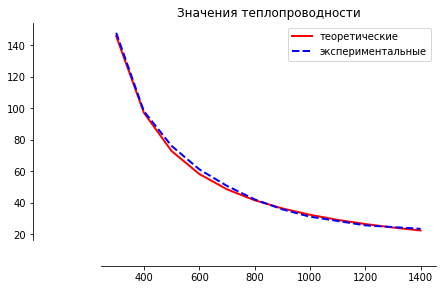

In [11]:
import matplotlib.pyplot as plt

line_th = plt.plot(t_list, lambda_list, label = 'теоретические')
line_exp = plt.plot(t_list, lambda_exp_list, label = 'экспериментальные')

# задаем стили для линий
plt.setp(line_exp, color= "blue", linestyle = "--", linewidth = 2 )
plt.setp(line_th, color= "red", linewidth = 2)

plt.legend()
plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title("Значения теплопроводности")
plt.show()

# Задача
Рассчитать ежемесячную сумму платежа по кредиту при использовании дифференцированных выплат (в этом случае ежемесячный платеж по погашению кредита постепенно уменьшается к концу периода кредитования). Сумма кредита составляет ***s*** рублей, срок кредита ***n*** месяцев, процент - ***k***%.

Для расчета платежа в месяц ***t*** используется формула:
$$
\begin{equation*}
    p(t) = \frac{s}{n} + (s-(t-1)\cdot \frac{s}{n})\cdot \frac{k}{12\cdot 100}
\end{equation*}
$$
Вычислить платежи для каждого месяца и доход банка (разница между суммарной выплатой и суммой кредита).

#### Входные данные:

* сумма кредита ***s*** руб (целое число);
* срок кредита ***n*** месяцев (целое число);
процент k (целое число).

#### Выходные данные

* n строк, на каждой из которых выведены платежи за каждый месяц, для вывода использовать формат:
    **"%2d месяц - %8.2f руб"**

* доход банка, для вывода использовать формат:
    **"Доход банка - %6.2f руб"**

In [12]:
# строки для форматного вывода
#"%2d месяц - %8.2f руб"
#"Доход банка - %6.2f руб"

# s = int(input()) 
# n = int(input()) # months
# k = int(input()) # %
s = 300000
n = 6
k = 20

def compute_payment(t, s, n, k):
    p = s/n + (s - (t-1) * s / n) * k / (12 * 100)
    return p

acc = 0
for t in range(1, n+1):
    p = compute_payment(t, s, n, k)
    print("%2d месяц - %8.2f руб" % (t, p))
    acc += p

print("Доход банка - %6.2f руб" % (acc - s))

 1 месяц - 55000.00 руб
 2 месяц - 54166.67 руб
 3 месяц - 53333.33 руб
 4 месяц - 52500.00 руб
 5 месяц - 51666.67 руб
 6 месяц - 50833.33 руб
Доход банка - 17500.00 руб


## Задача
Сравнить значения реальной численности населения в определенные годы со значениями, вычисленными по формуле в те же годы: 
$$
\begin{equation*}
    N(t) = \frac{C}{\tau}\cdot\arctan(\frac{T_1-t}{\tau})
\end{equation*}
$$
где:

$t$ - год, для которого вычисляется численность населения;

$C$ - 172 миллиарда человек·лет;

$T_1$ -  2000 год;

$\tau$ - 45 лет.

Точные значения численности и соответствующие года записаны в виде списков (их нужно скопировать в свою программу):
```python
years = [1000, 1750, 1800, 1850, 1900, 1950, 1955, 
         1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 
         2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015,
         2016, 2017, 2018, 2019]

population =[0.400, 0.791, 1.000, 1.262, 1.650, 2.519,
             2.756, 3.021, 3.335, 3.692, 4.068, 4.435, 4.831,
             5.264, 5.674, 6.071, 6.344, 6.933, 7.015, 7.100,
             7.162, 7.271, 7.358, 7.444, 7.530, 7.669, 7.763]  
```
Для заданного интервала лет вычислить:

* в каком году относительная погрешность между реальной и вычисленной численностью минимальна;
* в каком году относительная погрешность максимальна;
* среднюю погрешность в процентах.

**Входные данные**:

 два целых числа, соответствующие первому и последнему индексам списков, для которых нужно произвести вычисления.
Например, на входе программы числа 3 и 7. Это значит, что вычисления нужно произвести для списков, состоящих из элементов исходных списков с номерами 3, 4, 5, 6 и 7. Выделить эти элементы из, например, списка years можно с помощью среза years[3:8]. 

**Выходные данные**:

* год, в котором погрешность между реальной и вычисленной численностью минимальна (целое число);
* год, в котором погрешность между реальной и вычисленной численностью максимальна (целое число);
* средняя погрешность в процентах (вещественное число).

Для вывода использовать следующий формат:

**"Погрешность - минимальная, год: %4d, максимальная, год: %4d, средняя, процент: %6.3f"**

In [13]:
# строка форматного вывода
# "Погрешность - минимальная, год: %4d, максимальная, год: %4d, средняя, процент: %6.3f"%
import math

def arcctg(x):
    return math.pi/2 - math.atan(x)

def compute_population(t):
    # вычислить численность населения для года t по формуле
    C = 172
    T1 = 2000
    tau = 45
    
    N = C/tau * arcctg((T1-t)/tau)
    
    return N

years = [1000, 1750, 1800, 1850, 1900, 1950, 1955, 
         1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 
         2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015,
         2016, 2017, 2018, 2019]

population_real =[0.400, 0.791, 1.000, 1.262, 1.650, 2.519,
             2.756, 3.021, 3.335, 3.692, 4.068, 4.435, 4.831,
             5.264, 5.674, 6.071, 6.344, 6.933, 7.015, 7.100,
             7.162, 7.271, 7.358, 7.444, 7.530, 7.669, 7.763] 

population_exp = [compute_population(t) for t in years]

error = [(abs(population_exp[i] - population_real[i])) / population_real[i] for i in range(len(years))]

print("-" * 50)
print("|%5s |%7s | %7s | %7s |%8s |" % ("ind", "year","pop real","pop expect", "error"))
print( "-" * 50)
for i in range(len(years)):
    print("|%5d |%7d | %8.3f | %10.1f |%7.2f%% |"
          % (i, years[i], population_real[i], population_exp[i], error[i] * 100))
print("-" * 50)

--------------------------------------------------
|  ind |   year | pop real | pop expect |   error |
--------------------------------------------------
|    0 |   1000 |    0.400 |        0.2 |  57.03% |
|    1 |   1750 |    0.791 |        0.7 |  13.94% |
|    2 |   1800 |    1.000 |        0.8 |  15.41% |
|    3 |   1850 |    1.262 |        1.1 |  11.73% |
|    4 |   1900 |    1.650 |        1.6 |   2.05% |
|    5 |   1950 |    2.519 |        2.8 |  11.19% |
|    6 |   1955 |    2.756 |        3.0 |   8.92% |
|    7 |   1960 |    3.021 |        3.2 |   6.80% |
|    8 |   1965 |    3.335 |        3.5 |   4.27% |
|    9 |   1970 |    3.692 |        3.8 |   1.75% |
|   10 |   1975 |    4.068 |        4.1 |   0.06% |
|   11 |   1980 |    4.435 |        4.4 |   0.67% |
|   12 |   1985 |    4.831 |        4.8 |   1.18% |
|   13 |   1990 |    5.264 |        5.2 |   1.82% |
|   14 |   1995 |    5.674 |        5.6 |   1.64% |
|   15 |   2000 |    6.071 |        6.0 |   1.10% |
|   16 |   200

In [14]:
# i1 = int(input()) # first index
# i2 = int(input()) # second index
i1 = 7
i2 = 26

# slices
years = years[i1:i2+1]
population_real = population_real[i1:i2+1]
population_exp = population_exp[i1:i2+1]
error = error[i1:i2+1]

avg_error = sum(error) / len(years)

max_error = max(error)
min_error = min(error)

index_max_error = error.index(max_error)
index_min_error = error.index(min_error)

print("Погрешность - минимальная, год: %4d, максимальная, год: %4d, средняя, процент: %6.3f" 
      % (years[index_min_error], years[index_max_error], avg_error * 100))

Погрешность - минимальная, год: 1975, максимальная, год: 1960, средняя, процент:  1.929
